<i> Copyright &copy; 2025 Johns Hopkins University.  Not for distribution online or by any other means.</i>

Evan Edelstein, Programming Assignment 4, Algorithms 605.621

***Statement of Academic Integrity:*** The work in this exercise is mine alone without un-cited help. No AI was used to answer these questions. 

# Overview

In this assignment, we will continue to explore the Maryland Lighthouse Challenge problem.  In PA 2, you implemented a brute-force solution to the problem.  This is guaranteed to get the optimal solution, but it was extremely slow to run.  In PA 3, you implemented a technique called memoization, which traded memory for computation to speed up the results.  However, on very large data sets, this is still impractical, since the memory required for storing the intermediate results may also be excessively large.

In this assignment, we're going to give up on the requirement of finding the best possible path, and instead see if we can get an approximate solution that will be "good enough".  We will want to try to come to an understanding of both how much computation we will save, and how much error we will incur as a result.

The approximation technique we will use is a simple, greedy algorithm:  the algorithm will start at a (randomly-chosen) start light, and then move to the nearest neighbor left in the list.  This will continue until all lighthouses have been visited.  The exact path chosen, and thus the error introduced by the greedy algorithm, will vary depending on the start light and on the specific geometry of the lighthouse layout.  So, a point estimate of the performance will likely be misleading.  To handle this issue, you will be implementing a *Monte Carlo experiment*-- you will run the data collection multiple times, to collect an ensemble of error values, and then draw conclusions from a statistical analysis of the error data.

For this problem, you should use the following assumptions:
1. The contest requires a visit of all lighthouses; the winner is the first team to visit all lights (the contestants do not need to return to the start point).
1. Teams may start at any lighthouse, and finish at any other lighthouse. 
1. Travel time from A to B is the same as the time from B to A. (Equivalently, the paths A->B->C and C->B->A are equal, and your algorithm is correct if it provides either one.  You do not need to provide both.)
1. Several utility functions are provided for your use-- you may modify these as you see fit, or write your own.  Your fastest_tour_bf() program from PA 2 will be a utility function for you to use in this assignment, to calculate the error introduced by our approximation algorithm, and to compare the reduction in workload we achieve.


# Restrictions

1. You should only use Python inbuilt data structures for this assignment (e.g. lists, dictionaries, tuples, etc.)  *Hint:* Pay close attention to the rules on whether a Python data type is *mutable* (changeable) or *immutable* (not)-- remember that only *immutable* data items (like tuples) should be used as keys to dictionaries.
1. You may not use Python libraries for combinatorics, sorting, permutations, combinations, or similar tools.  You need to build all logical structures that traverse the data set yourself, so that you can accurately measure the workload imposed by your algorithmic choices.
1. Do not use Python's sort() function (or any other library function for sorting or ordering lists).  You will underestimate the workload imposed by your algorithm if you use the Python libraries.  An implementation of mergesort() is given to you in the utility programs block.  If you need to sort data, use this function and add an appropriate step-count variable to the code to account for the induced workload.
1. When in doubt, **ASK FIRST**
1. This is not a collaborative problem-- all the work in this notebook should be your individual effort
1. Don't change the signatures of the functions or the kickoff code, as this is used by the grader for automated correctness checking.  You will get points off if you modify the input and output blocks (noted with "DO NOT MODIFY THIS BLOCK") or if your code doesn't execute without modification.  
1. If you didn't get your code working correctly in PA 2, contact the instructor for assistance.


# PART 1:  IMPLEMENTATION

## 1a. Pseudocode (10 pts)

Given a start light and a list of lighthouses, use the nearest neighbor approximation to find the approximate best path using a greedy approach. 
	
<!--- This is a Markdown comment. -->
<!--- Separate the $...$ in many cases to get Latex to render properly.
      In output LaTeX, use incorrectly closed <span hidden> to pass in LaTeX options. -->
// ***I WILL MAKE THIS PSEUDOCODE INTO MY ALGORITHM.***

Function fastest_tour_nn returns an orderedList of lighthouses, the tour time, and the number of 'steps' taken by code. It assumes 3 external functions: list_minus, get_travel_time and mergeSort.

1. **function** fastest_tour_nn(start_light, L): <span hidden>\setlength\itemsep{0.0em}</div>
1. $~~~~$ tour $\gets$ [start_light] *# Hold tour of lighthouses*<br>
1. $~~~~$ tour_time $\gets$ 0 *# Hold tour time*<br>
1. $~~~~$ all_steps $\gets$ 0 *# Hold total number of steps*<br>
1. $~~~~$ L $\gets$ **list_minus**(L, start_light) *#Remove start_light from L*<br>
1. $~~~~$ current_light $\gets$ start_light
1. $~~~~$ 
1. $~~~~$ While len(L): *# While lighthouses left* 
1. $~~~~~~~$ next_time $\gets$ inf
1. $~~~~~~~$ for second_light in L:
1. $~~~~~~~~~~$ time $\gets$ **get_travel_time**(current_light, second_light) *# Get travel time between current_light and second_light*
1. $~~~~~~~~~~$ if time < next_time:
1. $~~~~~~~~~~~~~$ next_time $\gets$ time
1. $~~~~~~~~~~~~~$ next_light $\gets$ second_light
1. $~~~~~~~~~~$ all_steps += 1
1. $~~~~~~~$ 
1. $~~~~~~~$ tour_time += next_time *# Update tour time*
1. $~~~~~~~$ tour.append(next_light) *# Update tour list*
1. $~~~~~~~$ *# Setup next iteration of while loop by removing the visited lighthouse (next_light) from L and setting current_light to next_light*
1. $~~~~~~~$ L $\gets$ list_minus(L, next_light) 
1. $~~~~~~~$ current_light $\gets$ next_light
1. $~~~~$ **return** tour, tour_time, all_steps 



## 1b. English-language explanation (10 pts)

Write an English-language explanation of your pseudocode here

## 1c. Code implementation (25 pts)

Implement your pseudocode from above, using the following signature and code snippets.  Your code must have a reasonable, consistent, style and documentation. It must have appropriate data structures, modularity, and error checking.  Be sure to preserve the instructor input block, and do not change names of any of the variables - they will be inputted fresh by the instructor when testing your code.  Print the best tour and time, using the TRAVEL_TIME and L provided in the instructor input block, so that the correctness of your implementation can be validated.

In [13]:
####################################################
# INSTRUCTOR INPUT BLOCK
# THIS BLOCK WILL BE REPLACED BY INSTRUCTOR INPUTS
# DO NOT CHANGE THE NAMES OF THESE VARIABLES/METHODS
####################################################

TRAVEL_TIME = { 
      ('B', 'A') : 8.043412251828856 ,
      ('B', 'C') : 6.961562065036552 ,
      ('B', 'E') : 11.182761725279896 ,
      ('B', 'D') : 4.829491781522557 ,
      ('A', 'C') : 11.933637650024707 ,
      ('A', 'E') : 17.726993564286605 ,
      ('A', 'D') : 9.160385528861413 ,
      ('C', 'E') : 13.366783356602122 ,
      ('C', 'D') : 5.995980076893033 ,
      ('E', 'D') : 10.864682204416317 ,
}
# Additional test data is given at the bottom of the notebook.  You should also create your own test data as needed

# This function will populate a list L containing the names of the lighthouses
L = list(set([item for k in TRAVEL_TIME.keys() for item in k]))


In [14]:
# Utility functions that you can use if you wish

def list_minus(L, x):
    # Returns a list of L that does not have x in it
    return list(set(L)-set([x,]))

# def travel_time(x, y):
#     # Looks up x and y in TRAVEL_TIME in a way that order does not matter, returns a time
#     global TRAVEL_TIME
#     try:
#         tm = TRAVEL_TIME[(x,y)] 
#     except:
#         tm = TRAVEL_TIME[(y,x)]
#     return tm

# def random_lighthouses(n):
#     # Generates a random list of n lighthouses
#     # returns a dictionary in the same format as TRAVEL_TIME and a list of lighthouses (new_L)
    
#     from string import ascii_uppercase
#     from random import uniform
#     from itertools import combinations # students aren't allowed to use itertools for this assignment
#     from math import sqrt
    
#     new_TRAVEL_TIME = {}
#     new_L = []
#     letters = list(ascii_uppercase)
    
#     for i in range(1,n):
#         x = uniform(1, 10)
#         y = uniform(1, 10)
#         pt_name = letters[i-1]
#         pt = (pt_name, (x,y))
#         new_L.append(pt)
    
#     pairs = list(combinations(new_L,2))
#     for i in pairs:
#         pt1 = i[0][1]
#         pt2 = i[1][1]
#         dist = sqrt((pt1[0]+pt2[0]**2 + (pt1[1]+pt2[1])**2))
#         name = (i[0][0],i[1][0])
#         new_TRAVEL_TIME[name] = dist
#     return new_TRAVEL_TIME, new_L

def random_lighthouses(n):
    # Generates a random list of n lighthouses
    # returns a dictionary in the same format as TRAVEL_TIME and a list of lighthouses (new_L)

    from string import ascii_uppercase
    from random import uniform
    # students aren't allowed to use itertools for this assignment
    from itertools import combinations as illegal_for_students
    from math import sqrt

    new_TRAVEL_TIME = {}
    new_L = []
    pts = {}
    letters = list(ascii_uppercase)

    for i in range(1, n+1):
        x = uniform(1, 10)
        y = uniform(1, 10)
        pt_name = letters[i - 1]
        pts[pt_name] = (x, y)
        new_L.append(pt_name)

    pairs = list(illegal_for_students(new_L, 2))
    for i in pairs:
        pt1 = pts[i[0]]
        pt2 = pts[i[1]]
        dist = sqrt((pt1[0] + pt2[0] ** 2 + (pt1[1] + pt2[1]) ** 2))
        name = (i)
        new_TRAVEL_TIME[name] = dist
    return new_TRAVEL_TIME, new_L

def lighthouse_names(L):
    # Gets a list of the names of the lighthouses in dictionary L
    return list(set([item for k in TRAVEL_TIME.keys() for item in k]))

def mergeSort(inputList):
    # takes a list of values and returns a sorted list
    # if you use this, be sure to count the workload steps here
    #      consistent with the way you count them in your algorithm
    steps = 0
    if len(inputList) > 1:
        mid = len(inputList) // 2
        left = inputList[:mid]
        right = inputList[mid:]

        # Recursive call on each half
        _, lsteps = mergeSort(left)
        _, rsteps = mergeSort(right)
        steps += lsteps + rsteps
        
        # Two iterators for traversing the two halves
        i = 0
        j = 0
        
        # Iterator for the main list
        k = 0
        
        while i < len(left) and j < len(right):
            if left[i][1] <= right[j][1]:
              # The value from the left half has been used
              inputList[k] = left[i]
              # Move the iterator forward
              i += 1
            else:
                inputList[k] = right[j]
                j += 1
            # Move to the next slot
            k += 1
            steps +=1

        # For all the remaining values
        while i < len(left):
            inputList[k] = left[i]
            i += 1
            k += 1
            steps +=1

        while j < len(right):
            inputList[k]=right[j]
            j += 1
            k += 1
            steps +=1
            
    return (inputList), steps

In [15]:
####################################################
# MY BRUTE FORCE FUNCTION
####################################################
from math import inf
# Put your code for fastests_tour_bf() from PA 2 or fastest_tour_nn() from PA 3 here
# to use as a utility function.  If your fastest_tour_memo() code is correct, it would be 
# better for you to use it than the brute force code as a benchmark... but it has to be
# correct or you will generate errors on your Monte Carlo experiment
def get_travel_time(x: str, y: str) -> float:
    # Looks up x and y in TRAVEL_TIME in a way that order does not matter, returns a time
    global TRAVEL_TIME
    tm = TRAVEL_TIME.get((x, y), TRAVEL_TIME.get((y, x)))
    if tm is None:
        raise KeyError(f"{x=} and {y=} not in TRAVEL_TIME.")
    return tm

def fastest_tour_bf(start_light: str, L: list[str]) -> tuple[list[str], float, int]:
    # used to store the running best overall tour that starts at start_light
    best_tour, best_time, steps,  = [], inf, 0
    L = list_minus(L, start_light)  # remove start_light from list

    if len(L) == 0:
        return [start_light], 0, 1

    for second_light in L:
        # recurse to find shortest subpath of L starting from second_light
        sub_tour, sub_time, sub_steps = fastest_tour_bf(second_light, L)
        steps += sub_steps
        # calc time between start_light and second_light
        sub_time += get_travel_time(start_light, second_light)
        if sub_time < best_time:  # update best_tour and best_time with new candidate
            best_tour = sub_tour
            best_time = sub_time

    # insert start_light at the front of best tour
    best_tour.insert(0, start_light)
    return best_tour, best_time, steps


####################################################
# MY MEMOIZED FUNCTION
####################################################

global memo_hits
memo_hits = 0
global memo_miss
memo_miss = 0
global memo
memo = {}


def reset_memo():
    global memo_hits
    memo_hits = 0
    global memo_miss
    memo_miss = 0
    global memo
    memo = {}


def fastest_tour_memo(start_light: str, L: list[str]) -> tuple[list[str], float, int]:
    """ 
    Find the fastest tour through L starting at start_light using memoization to store already computed tours.
    Assumes a global dictionary memo is available and keyed on a tuple (lighthouse, frozenset(lighthouses)). The memo values should be of the form (best_tour, best_time). 
    The number of "computational steps" taken by the function is stored in all_steps and the number of times the best_tour/time is retrieved from the memo is stored in a global counter memo_hits. 

    Args:
        start_light (str): starting lighthouse
        L (list[str]): list of lighthouses of tour

    Returns:
        best_tour (list[str]): best tour of lighthouses
        best_time (float): time to traverse lighthouse tour
        all_steps (int): number of computational steps executed by the algorithm
    """
    best_tour = []  # used to store the running best overall tour that starts at start_light
    best_time = inf  # used to store the time for the best_tour sequence
    all_steps = 0  # count all O(1) work here
    L = list_minus(L, start_light)  # O(1)
    memo_lookup_key = (start_light, frozenset(L))  # O(1)?

    # MEMO HIT: return best_tour and best_time from memo - O(1)
    if memo_lookup_key in memo:
        # get best tour and time from memo
        best_tour, best_time = memo[memo_lookup_key]
        global memo_hits
        memo_hits += 1  # record memo hit
        return best_tour, best_time, 1

    global memo_miss
    memo_miss += 1  # record memo miss

    # BASE CASE: return start_light, tour time of zero, and single step
    if len(L) == 0:  # O(1)
        memo[memo_lookup_key] = ([start_light], 0.0)
        return [start_light], 0.0, 1

    # BASE CASE: return start_light, tour time of zero, and single step
    # if len(L) == 1:
    #     best_tour = [start_light, L[0]]
    #     best_time = get_travel_time(start_light, L[0])
    #     memo[memo_lookup_key] = (best_tour, best_time)
    #     return best_tour, best_time, 1

    # RECURSIVE CASE: recurse to find shortest subpath of L starting from second_light
    for second_light in L:  # O(n-1)
        curr_tour, curr_time, steps = fastest_tour_memo(second_light, L)
        all_steps += steps
        curr_time += get_travel_time(start_light, second_light)
        if curr_time < best_time:  # update best_tour and best_time with new candidate
            best_tour = curr_tour
            best_time = curr_time

    # insert start_light at the front of best tour
    best_tour = [start_light] + best_tour
    memo[memo_lookup_key] = (best_tour, best_time)  # add best tour to memo
    return best_tour, best_time, all_steps

In [16]:
####################################################
# MY NEAREST NEIGHBOR FUNCTION
####################################################

from math import inf

def fastest_tour_nn(start_light: str, L: list[str]) -> tuple[list[str], float, int]:
    """ 
    Find a tour through L starting at start_light using nearest neighbor search to greedily tour the lighthouses. At each iteration, the closest lighthouse is chosen as the next lighthouse to tour.
 
    Args:
        start_light (str): starting lighthouse
        L (list[str]): list of lighthouses of tour

    Returns:
        tour (list[str]): tour of lighthouses
        tour_time (float): time to traverse lighthouse tour
        all_steps (int): number of computational steps executed by the algorithm
    """
    
    # best_tour = []  # used to store the running best overall tour that starts at start_light
    # best_time = inf # used to store the time for the best_tour sequence
    
    # Nearest Neighbor 
    tour = [start_light]  # used to store the running best overall tour that starts at start_light
    tour_time = 0  # used to store the time for the tour sequence
    all_steps = 0
    L = list_minus(L, start_light)  # remove start_light from list
    current_light = start_light 
    while len(L):
        next_time = inf
        for second_light in L: # O(n)
            time = get_travel_time(current_light, second_light)
            if time < next_time:
                next_time = time
                next_light = second_light
            all_steps += 1 

        # distances, steps = mergeSort(distances) # sort by distance from current_light  - O(nlogn)
        # all_steps += steps 
        # Update output
        # next_light, next_time = distances.pop(0) #get closest lighthouse
        tour_time += next_time
        tour.append(next_light)
        # Prepare for next iteration
        L = list_minus(L, next_light)
        current_light = next_light

    return tour, tour_time, all_steps  


In [17]:
####################################################
# KICKOFF CODE
# Suggested structure to kick off your calculations
# You will need to adjust this code to match your implementation
####################################################

from random import choice

start_light = choice(L)
print(L, start_light)
L_minus = list_minus(L, start_light)
best_tour, best_time, steps = fastest_tour_nn(start_light, L_minus)

print("The best tour is: ", ', '.join(best_tour))
print("The best time is: ", best_time)
print("Number of steps is: ", steps)

['B', 'E', 'A', 'D', 'C'] E
The best tour is:  E, D, B, C, A
The best time is:  34.589373701000135
Number of steps is:  10


In [18]:
####################################################
# CORRECTNESS CHECK
# Used by the grader to check correctness
# Chosen start_light to remove randomness
####################################################

TRAVEL_TIME = { 
      ('B', 'A') : 8.043412251828856 ,
      ('B', 'C') : 6.961562065036552 ,
      ('B', 'E') : 11.182761725279896 ,
      ('B', 'D') : 4.829491781522557 ,
      ('A', 'C') : 11.933637650024707 ,
      ('A', 'E') : 17.726993564286605 ,
      ('A', 'D') : 9.160385528861413 ,
      ('C', 'E') : 13.366783356602122 ,
      ('C', 'D') : 5.995980076893033 ,
      ('E', 'D') : 10.864682204416317 ,
}

L = list(set([item for k in TRAVEL_TIME.keys() for item in k]))

start_light = "A"
L_minus = list_minus(L, start_light)


# Uncomment one of these implementations
# If using a recursive step count:
best_tour, best_time, steps = fastest_tour_nn(start_light, L_minus)

# If using a global step count:
#steps = 0
#best_tour, best_time, _ = fastest_tour_nn(start_light, L_minus)

print("The best tour is: ", ', '.join(best_tour))
print("The best time is: ", best_time)
print("Number of steps is: ", steps)


The best tour is:  A, B, D, C, E
The best time is:  32.23566746684657
Number of steps is:  10


# PART 2: ANALYSIS

## 2a. Asymptotic bounds (10 pts)

Using the techniques that you learned in Modules 1 and 2, provide an analytic estimate of the asymptotic bounds (Big-O, Big-Theta, etc.) for your algorithm. 


## 2b. Error bounds (10 pts)

What theoretical bound can you place on the best and worst case error that the nearest neighbor algorithm will have?

*Hint: the best-case scenario should be pretty obvious.  For the worst case, you will need to consider what geometric layout and choice of start point will cause the worst possible outcome.  Remember that you are working on a 2D Euclidean plane here, so the Triangle Inequality will likely come into play.*

## 2c. Monte Carlo experiment (25 pts)

Here, we will only need to look at the error (you don't have to graph the asymptotic bounds on the workload for this assignment).  In a Monte Carlo experiment, the model is run repeatedly on data sets that have random variations in the parameters.  In this case, what will change the outcome of the approximation algorithm will be the geometry of the lighthouses and the starting light.  So, the steps in the experiment will be:

1. Generate a new set of lighthouses, using the provided utility function
1. Run the brute force (or memoized) algorithm against the lighthouse list, to find the true best path
1. Run the nearest neighbor algorithm on the same lighthouse list
1. Compare the nearest neighbor best time to the true best time, to determine the error
1. Repeat this loop enough times to gather sufficient data to evaluate the goodness of the nearest neighbor approximation

*Hints: 
1. You will need to check this against varying numbers of lighthouses as well.  
1. Think carefully about what data would be most relevant to analyzing how "good" or "bad" the nearest neighbor approximation is-- what data should you collect?  Best/worst error?  Median error?  Mean error?  Standard deviation?
1. Consider also that the raw error will be larger if the total path length is longer-- should you normalize the value?  And how would you normalize it?
1. Allow plenty of time for the experiment-- the brute force algorithm is very slow, especially with larger n.  You will have to generate enough runs to ensure that you are getting a representative sample of errors-- more is better, as a rule, but you will not have time to run truly large-scale data runs here.  Begin with only small values for the number of iterations (say, five) and ensure that your code is working well before increasing the number of runs to a robust number for your final data run.

In [7]:
# MY CODE BLOCK TO EXPERIMENT WITH 3-10 LIGHTHOUSES AND GATHER ERROR DATA
# For your final data collection run, you should have at least 25 iterations for each number of lighthouses
def fastest_tour_wrapper_bf(L: list[str], travel_time_dict: dict[tuple[str, str], float]):
    """ Wrapper to fastest_tour_bf to find shortest path amongst all starting possible lighthouses

    Args:
        L (list[str]): light of lighthouses to visit
        travel_time_dict (dict[tuple[str], float]): _description_

    Returns:
        best_tour (list[str]): list of lighthouses to tour with fastest time
        best_time (float): time to traverse lighthouse tour
        steps (int): number of recursive steps executed by the algorithm
        tours (dict[(list[str], float)]): a mapping of each starting light to the best tour and time
    """
    # print(f"BF: Working on {L=}")
    # update global dict TRAVEL_TIME
    global TRAVEL_TIME
    TRAVEL_TIME = travel_time_dict
    best_tour = []
    best_time = inf
    outer_steps = 0
    for start_light in L:
        sub_tour, sub_time, sub_steps = fastest_tour_bf(start_light, L)
        outer_steps += sub_steps
        if sub_time < best_time:
            best_tour = sub_tour
            best_time = sub_time
    # print("BF - The best tour is: ", ', '.join(best_tour))
    # print("BF - The best time is: ", best_time)
    # print("BF - # of steps: ", outer_steps)
    return best_tour, best_time, outer_steps


def fastest_tour_wrapper_memo(L: list[str], travel_time_dict: dict[tuple[str, str], float]):
    """ Wrapper to fastest_tour_memo to find shortest path amongst all starting possible lighthouses

    Args:
        L (list[str]): light of lighthouses to visit
        travel_time_dict (dict[tuple[str], float]): _description_

    Returns:
        best_tour (list[str]): list of lighthouses to tour with fastest time
        best_time (float): time to traverse lighthouse tour
        steps (int): number of computational steps executed by the algorithm
        tours (dict[(list[str], float)]): a mapping of each starting light to the best tour and time
        memo_size (int): size of memo dict 
    """
    # print(f"MEMO: Working on {L=}")
    # update global dict TRAVEL_TIME
    global TRAVEL_TIME
    TRAVEL_TIME = travel_time_dict
    tours = {}
    best_tour = []
    best_time = inf
    outer_steps = 0
    reset_memo()  # reset memo dict and memo hits/miss counter
    for start_light in L:
        L_minus = list_minus(L, start_light)
        sub_tour, sub_time, sub_steps = fastest_tour_memo(start_light, L_minus)
        outer_steps += sub_steps
        tours[start_light] = (sub_tour, sub_time)
        if sub_time < best_time:
            best_tour = sub_tour
            best_time = sub_time
    # print("MEMO - The best tour is: ", ', '.join(best_tour))
    # print("MEMO - The best time is: ", best_time)
    # print("MEMO - # of steps: ", outer_steps)
    # print("MEMO - Memo Size: ", len(memo))
    return best_tour, best_time, outer_steps

def fastest_tour_wrapper_nn(L, travel_time_dict):
    global TRAVEL_TIME
    TRAVEL_TIME = travel_time_dict
    start_light = choice(L) # Randomly choose start_light from L
    best_tour, best_time, steps = fastest_tour_nn(start_light, L)
    # print("NN - The best tour is: ", ', '.join(best_tour))
    # print("NN - The best time is: ", best_time)
    # print("NN - # of steps: ", outer_steps)
    return best_tour, best_time, steps

def monte_carlo(start, stop , n_iters):
    memo_times = {i:[] for i in range(start, stop)}
    nn_times   = {i:[] for i in range(start, stop)}
    memo_steps = {i:[] for i in range(start, stop)}
    nn_steps   = {i:[] for i in range(start, stop)}

    for _ in range(n_iters):
        for i in range(start, stop):
            time_dict, L  = random_lighthouses(i)
            best_tour, best_time, steps= fastest_tour_wrapper_memo(L, time_dict)
            # best_tour, best_time, steps= fastest_tour_wrapper_bf(L, time_dict)

            memo_times[i].append(best_time)
            memo_steps[i].append(steps)

            best_tour, best_time, steps = fastest_tour_wrapper_nn(L, time_dict)
            nn_times[i].append(best_time)
            nn_steps[i].append(steps)
    return memo_times, nn_times, memo_steps, nn_steps

START = 3
STOP = 15
N_ITERS = 26
xvals = [i for i in range(START, STOP)]
memo_times, nn_times, memo_steps, nn_steps =  monte_carlo(START, STOP, N_ITERS)

### Plot
Plot your data here.  Use a graph type that gives meaningful information on the performance of the nearest neighbor algorithm-- pretend that you are briefing your boss on whether to switch a major business process from a brute force implementation to a nearest neighbor implementation-- what data would he/she find useful to quantify the tradeoff between the "optimum" calculation and the "good enough" calculation?

{3: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], 4: [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], 5: [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10], 6: [15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15], 7: [21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21], 8: [28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28], 9: [36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36], 10: [45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45], 11: [55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55], 12: [66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66,

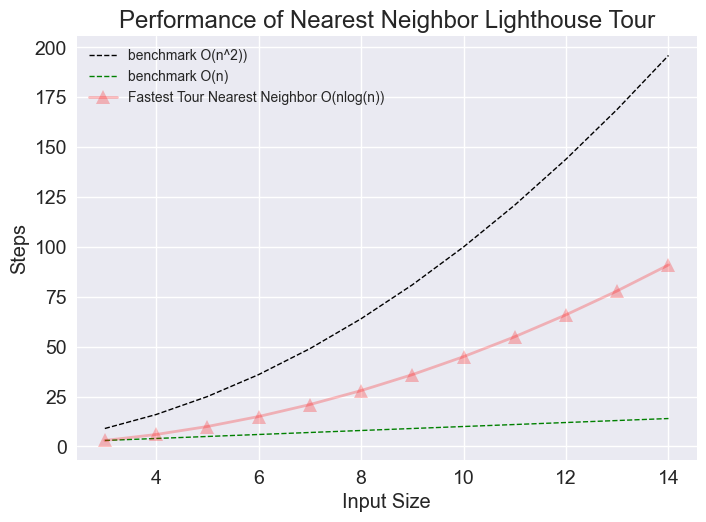

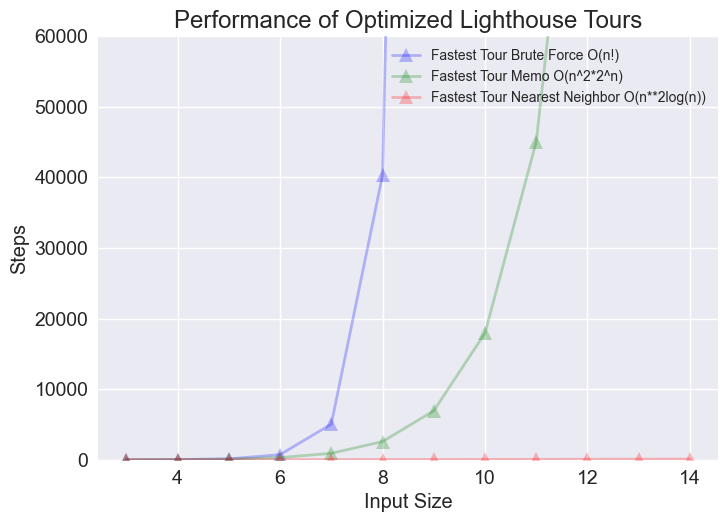

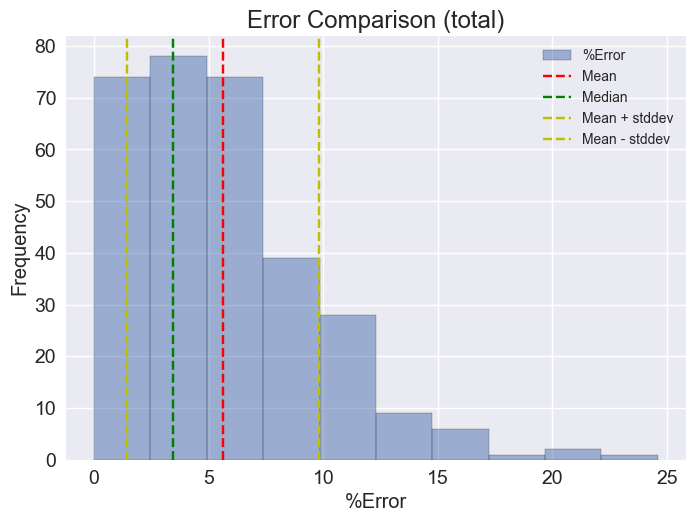

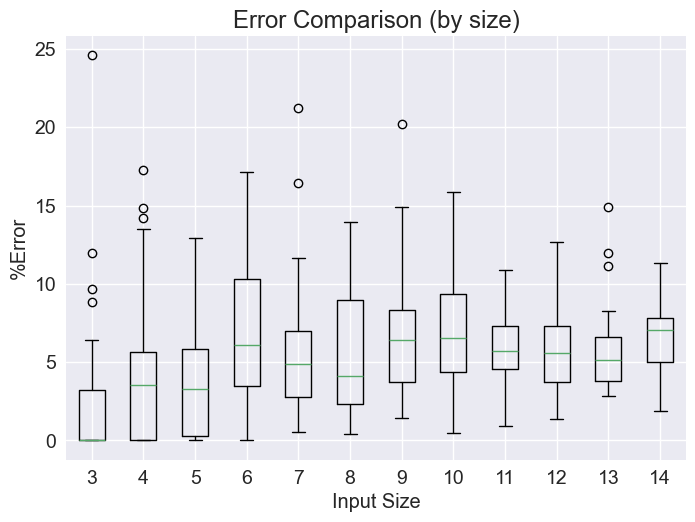

In [12]:
####################################################
# PUT YOUR PLOT CODE HERE
# 
####################################################
%matplotlib inline
import matplotlib.pyplot as plt
from math import factorial, log2, sqrt
plt.style.use('seaborn-v0_8')

def plot_whisker(xvals, memo_times, nn_times):
    errors = []
    for i in memo_times: 
        m = memo_times[i]
        n = nn_times[i]
        errors.append([((k-j)/j)*100 for j,k in zip (m, n)])


    plt.figure()
    plt.title("Error Comparison (by size)", size="xx-large")
    plt.ylabel("%Error", size="x-large")
    plt.xlabel("Input Size", size="x-large")
    plt.boxplot(errors, positions=xvals)
    plt.tick_params(axis="both", which="major", labelsize=14)
    plt.show()


def plot_error(xvals, memo_times, nn_times):
    errors = []
    for i in memo_times: 
        errors.extend([((n-m)/m)*100 for m, n in zip (memo_times[i], nn_times[i])])
    mean = sum(errors) / len(errors)
    median = errors[len(errors)//2]
    errors.sort()
    # best = errors[0]
    # worst = errors[-1]
    var  = sum([(x-mean)**2 for x in errors]) / len(errors)
    stddev  = sqrt(var)

    plt.figure()
    plt.title("Error Comparison (total)", size="xx-large")
    plt.ylabel("Frequency", size="x-large")
    plt.xlabel("%Error", size="x-large")
    plt.hist(errors, label="%Error", alpha=0.50, edgecolor='black')
    plt.axvline(x=mean, color='r', linestyle='--', label='Mean')
    plt.axvline(x=median, color='g', linestyle='--', label='Median')
    plt.axvline(x=mean + stddev, color='y', linestyle='--', label='Mean + stddev')
    plt.axvline(x=mean - stddev, color='y', linestyle='--', label='Mean - stddev')
    plt.tick_params(axis="both", which="major", labelsize=14)
    plt.legend()
    plt.show()


def plot_steps(xvals, nn_steps):
    plt.figure()
    plt.title("Performance of Nearest Neighbor Lighthouse Tour", size="xx-large")
    plt.ylabel("Steps", size="x-large")
    plt.xlabel("Input Size", size="x-large")
    nn_steps_to_plot = [v[0] for k,v in nn_steps.items()]

    yTestVals1 = []
    yTestVals2 = []
    for i in xvals:
        yTestVals1.append(i**2)
        yTestVals2.append(i)

    plt.plot(xvals, yTestVals1, "k^--", markersize=0,linewidth=1, label="benchmark O(n^2))") 
    plt.plot(xvals, yTestVals2, "g^--", markersize=0,linewidth=1, label="benchmark O(n)") 

    plt.plot(xvals, nn_steps_to_plot, "r^-", markersize=10, linewidth=2, label="Fastest Tour Nearest Neighbor O(nlog(n))",  alpha=0.25)
    plt.tick_params(axis="both", which="major", labelsize=14)
    plt.legend()
    plt.show()

def plot_steps_comparison(xvals, memo_steps, nn_steps, limit=True):
    plt.figure()
    plt.title("Performance of Optimized Lighthouse Tours", size="xx-large")
    plt.ylabel("Steps", size="x-large")
    plt.xlabel("Input Size", size="x-large")
    if limit: 
        plt.ylim([0, 60000])  # y-axis scale

    bf_steps = [factorial(i) for i in xvals]
    memo_steps_avrg = [sum(v)/len(v) for k,v in memo_steps.items()]
    nn_steps_to_plot = [v[0] for k,v in nn_steps.items()]

    # plot bf and memo steps
    plt.plot(xvals, bf_steps, "b^-", markersize=10, linewidth=2, label="Fastest Tour Brute Force O(n!)",  alpha=0.25)
    plt.plot(xvals, memo_steps_avrg, "g^-", markersize=10, linewidth=2, label="Fastest Tour Memo O(n^2*2^n)",  alpha=0.25)
    plt.plot(xvals, nn_steps_to_plot, "r^-", markersize=10, linewidth=2, label="Fastest Tour Nearest Neighbor O(n**2log(n))",  alpha=0.25)
    plt.tick_params(axis="both", which="major", labelsize=14)
    plt.legend()
    plt.show()

print(nn_steps)
plot_steps(xvals, nn_steps)
plot_steps_comparison(xvals, memo_steps, nn_steps)
plot_error(xvals, memo_times, nn_times)
plot_whisker(xvals, memo_times, nn_times)

# PART 3 RETROSPECTION

## Retrospection (10 pts)

Explain your results here.  Your graph should "tell a story"... write the story in plain English here.

If you had a problem with your code, or graph, write down here how you followed the 1-2-3 Rule given in the Getting Started module.  You should explain what you tried to do, what did/did not work, and what you would do next if you had additional time.  **Important:  don't just turn in broken code, or graphs that don't match your analytic results!**  It's important to show that, if there was some problem, you recognized that there was an issue and what you were doing to resolve the disconnect.  Bugs and mistakes do happen, time does run out, but you need to show what you understand of the problem in order to get at least partial credit.  

## Citations
[1] Cormen, Thomas H., et al. Introduction to Algorithms, Fourth Edition, MIT Press, 2022. ProQuest Ebook Central, https://ebookcentral-proquest-com.proxy1.library.jhu.edu/lib/jhu/detail.action?docID=6925615.

[2] Course material 

[3] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

[4] https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_alpha.html

In [9]:
# INSTRUCTOR-PROVIDED TEST DATA
# Ensure that your code matches both the input signature and the expected output
# For grading, different test data will be pasted into the input cell and your code cells will be executed
# Be sure that your input and output signatures match the provided sample data
# Times are symmetrical, so the reverse order tour is also acceptable (e.g. A, B, C or C, B, A)

# Test #1
TRAVEL_TIME = { 
      ('D', 'E') : 9.8874546134365 ,
      ('D', 'B') : 8.650955785569098 ,
      ('D', 'C') : 4.527990409960845 ,
      ('D', 'A') : 9.817667809230786 ,
      ('E', 'B') : 10.931854306263975 ,
      ('E', 'C') : 7.255251488484818 ,
      ('E', 'A') : 12.917982527478712 ,
      ('B', 'C') : 4.113565483054365 ,
      ('B', 'A') : 9.560863383439097 ,
      ('C', 'A') : 7.854345573910511 ,
}
# Expected output
# The best tour is:  A, B, C, D, E
# The best time is:  28.089873889890804

# Test #2
TRAVEL_TIME = { 
      ('B', 'C') : 6.429795406216918 ,
      ('B', 'A') : 11.629846115160516 ,
      ('B', 'D') : 7.679251919404714 ,
      ('B', 'E') : 9.347706263090837 ,
      ('C', 'A') : 12.280646160363432 ,
      ('C', 'D') : 7.746192483295421 ,
      ('C', 'E') : 9.90681627370574 ,
      ('A', 'D') : 12.227183481562683 ,
      ('A', 'E') : 16.655823285647106 ,
      ('D', 'E') : 8.25715774835559 ,
}
# Expected output
# The best tour is:  A, B, C, D, E
# The best time is:  34.06299175302845

# Test #3
TRAVEL_TIME = { 
      ('F', 'E') : 7.453320453415392 ,
      ('F', 'D') : 6.170569410345761 ,
      ('F', 'I') : 10.448429302986911 ,
      ('F', 'G') : 6.187750187309644 ,
      ('F', 'C') : 12.090422838563583 ,
      ('F', 'H') : 11.539119418380032 ,
      ('F', 'A') : 13.23865323724485 ,
      ('F', 'J') : 14.209616157057711 ,
      ('F', 'B') : 12.029520235766265 ,
      ('E', 'D') : 4.594971038617467 ,
      ('E', 'I') : 9.488857351897519 ,
      ('E', 'G') : 4.661282508675182 ,
      ('E', 'C') : 10.705763401441896 ,
      ('E', 'H') : 10.12354365573923 ,
      ('E', 'A') : 12.05863087182219 ,
      ('E', 'J') : 12.857918364285274 ,
      ('E', 'B') : 10.915808926216425 ,
      ('D', 'I') : 8.773798408565863 ,
      ('D', 'G') : 3.549820998388679 ,
      ('D', 'C') : 9.084763991756446 ,
      ('D', 'H') : 8.47244200438249 ,
      ('D', 'A') : 10.768085646027655 ,
      ('D', 'J') : 11.205467989446557 ,
      ('D', 'B') : 9.811703475051996 ,
      ('I', 'G') : 4.856711290250502 ,
      ('I', 'C') : 10.303247633652786 ,
      ('I', 'H') : 9.72873923304563 ,
      ('I', 'A') : 11.752971702744057 ,
      ('I', 'J') : 12.386140947772116 ,
      ('I', 'B') : 10.715926552978804 ,
      ('G', 'C') : 8.939922836985131 ,
      ('G', 'H') : 8.325372714362043 ,
      ('G', 'A') : 10.658709470483634 ,
      ('G', 'J') : 11.05300320168352 ,
      ('G', 'B') : 9.726036954632448 ,
      ('C', 'H') : 14.85107596522508 ,
      ('C', 'A') : 16.127909792272288 ,
      ('C', 'J') : 17.54748278310382 ,
      ('C', 'B') : 14.699070399680458 ,
      ('H', 'A') : 15.723529687188293 ,
      ('H', 'J') : 17.10791004081554 ,
      ('H', 'B') : 14.306778662449995 ,
      ('A', 'J') : 16.949188359233272 ,
      ('A', 'B') : 14.239542023142393 ,
      ('J', 'B') : 16.6207970728817 ,
}
# Expected output
# The best tour is:  A, B, C, D, E, F, G, H, I, J
# The best time is:  86.69967098910159

# Test 4 - test against the actual lighthouses used in the challenge, so
# you can see the original motivation for this assignment.  Times are from
# maps.google.com and reflect best possible driving times between two 
# lighthouses subject to current traffic conditions.

# If you want to visualize this tour, it's here:
# https://goo.gl/maps/h9NbbQT5kS3S6kZ98

# Note that in the real world, travel times are highly dependent on time of
# day and are often not symmetrical-- that's part of why the TSP problem is
# so interesting!


TRAVEL_TIME = { 
    ('Concord Point', 'Seven Foot Knoll') : 0.88 ,
    ('Concord Point', 'Lightship Chesapeake') : 0.87 ,
    ('Concord Point', 'Hooper Strait') : 1.92 ,
    ('Concord Point', 'Choptank River') : 2.02 ,
    ('Concord Point', 'Drum Point') : 2.12 ,
    ('Concord Point', 'Cove Point') : 2.15 ,
    ('Concord Point', 'Piney Point') : 2.60 ,
    ('Concord Point', 'Point Lookout') : 2.73 ,
    ('Concord Point', 'Fort Washington') : 1.73 ,
    ('Concord Point', 'Sandy Point') : 1.28 ,
    ('Seven Foot Knoll', 'Lightship Chesapeake') : 0.07 ,
    ('Seven Foot Knoll', 'Hooper Strait') : 1.52 ,
    ('Seven Foot Knoll', 'Choptank River') : 1.62 ,
    ('Seven Foot Knoll', 'Drum Point') : 1.58 ,
    ('Seven Foot Knoll', 'Cove Point') : 1.62 ,
    ('Seven Foot Knoll', 'Piney Point') : 2.05 ,
    ('Seven Foot Knoll', 'Point Lookout') : 2.22 ,
    ('Seven Foot Knoll', 'Fort Washington') : 1.17 ,
    ('Seven Foot Knoll', 'Sandy Point') : 0.78 ,
    ('Lightship Chesapeake', 'Hooper Strait') : 1.47 ,
    ('Lightship Chesapeake', 'Choptank River') : 1.57 ,
    ('Lightship Chesapeake', 'Drum Point') : 1.53 ,
    ('Lightship Chesapeake', 'Cove Point') : 1.57 ,
    ('Lightship Chesapeake', 'Piney Point') : 1.98 ,
    ('Lightship Chesapeake', 'Point Lookout') : 2.17 ,
    ('Lightship Chesapeake', 'Fort Washington') : 1.12 ,
    ('Lightship Chesapeake', 'Sandy Point') : 0.73 ,
    ('Hooper Strait', 'Choptank River') : 0.60 ,
    ('Hooper Strait', 'Drum Point') : 2.03 ,
    ('Hooper Strait', 'Cove Point') : 2.08 ,
    ('Hooper Strait', 'Piney Point') : 2.50 ,
    ('Hooper Strait', 'Point Lookout') : 2.67 ,
    ('Hooper Strait', 'Fort Washington') : 1.77 ,
    ('Hooper Strait', 'Sandy Point') : 0.93 ,
    ('Choptank River', 'Drum Point') : 2.13 ,
    ('Choptank River', 'Cove Point') : 2.17 ,
    ('Choptank River', 'Piney Point') : 2.60 ,
    ('Choptank River', 'Point Lookout') : 2.77 ,
    ('Choptank River', 'Fort Washington') : 1.85 ,
    ('Choptank River', 'Sandy Point') : 1.03 ,
    ('Drum Point', 'Cove Point') : 0.23 ,
    ('Drum Point', 'Piney Point') : 0.48 ,
    ('Drum Point', 'Point Lookout') : 0.63 ,
    ('Drum Point', 'Fort Washington') : 1.18 ,
    ('Drum Point', 'Sandy Point') : 1.32 ,
    ('Cove Point', 'Piney Point') : 0.70 ,
    ('Cove Point', 'Point Lookout') : 0.83 ,
    ('Cove Point', 'Fort Washington') : 1.28 ,
    ('Cove Point', 'Sandy Point') : 1.35 ,
    ('Piney Point', 'Point Lookout') : 0.72 ,
    ('Piney Point', 'Fort Washington') : 1.42 ,
    ('Piney Point', 'Sandy Point') : 1.78 ,
    ('Point Lookout', 'Fort Washington') : 1.67 ,
    ('Point Lookout', 'Sandy Point') : 1.97 ,
    ('Fort Washington', 'Sandy Point') : 1.05 ,   
}

# Expected output
# The best tour is:  Choptank River, Hooper Strait, Sandy Point, Concord Point, Seven Foot Knoll, Lightship Chesapeake, 
#       Fort Washington, Cove Point, Drum Point, Piney Point, Point Lookout
# The best time is:  7.59